# Set path - Init 

In [13]:
import sys 
sys.path.append('/home/pierre-edouard/Desktop/ICL/Git_LHCb')

import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
from scipy import interpolate
import time 
from tqdm import tqdm
import csv 
import seaborn as sns


import b_meson_fit as bmf 
from toy_minuit import toy
from test_iminuit import amplitude_latex_names ,amplitude_names, LaTex_labels , Standard_labels  , fix_array , fix_alphas , fix_one_alpha , fix_alpha_beta  ,fix_alpha_beta_gamma5


# I ) Fitting w/o background signal 

50
[2.31624795 3.20325674 2.4360365  3.4643665  3.1491171  3.73820698
 2.54053897 2.26295117 3.26994911 3.69943763 4.45422751 3.7879647
 3.22118121 2.78816238 3.69682483 2.64903665 3.38886605 2.79088494
 4.36668387 4.27464974 2.1578166  3.17463401 3.79292192 2.8341175
 3.64333782 2.57719818 3.24953561 4.0393893  3.51980558 3.34094664
 2.50161749 3.04919705 3.16570798 3.63599449 4.15446959 3.5645474
 2.64698423 3.52826811 3.39151645 3.09742625 2.83633691 2.12289621
 3.51376049 4.06961009 3.72183375 3.13567139 3.20720674 2.7514641
 3.33562335 4.63288754]


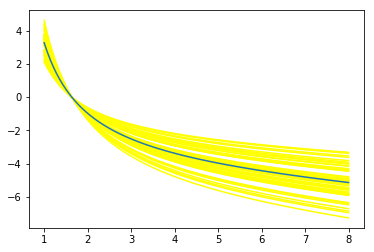

[ 3.27782627e+00  2.72748279e+00  2.24369063e+00  1.81480331e+00
  1.43174208e+00  1.08732524e+00  7.75797244e-01  4.92491425e-01
  2.33584136e-01 -4.08739437e-03 -2.23161930e-01 -4.25858430e-01
 -6.14056341e-01 -7.89358139e-01 -9.53138537e-01 -1.10658356e+00
 -1.25072185e+00 -1.38644992e+00 -1.51455274e+00 -1.63572050e+00
 -1.75056258e+00 -1.85961897e+00 -1.96336991e+00 -2.06224391e+00
 -2.15662454e+00 -2.24685621e+00 -2.33324896e+00 -2.41608272e+00
 -2.49561084e+00 -2.57206318e+00 -2.64564878e+00 -2.71655815e+00
 -2.78496529e+00 -2.85102942e+00 -2.91489656e+00 -2.97670081e+00
 -3.03656561e+00 -3.09460471e+00 -3.15092316e+00 -3.20561809e+00
 -3.25877946e+00 -3.31049070e+00 -3.36082930e+00 -3.40986732e+00
 -3.45767187e+00 -3.50430552e+00 -3.54982666e+00 -3.59428990e+00
 -3.63774629e+00 -3.68024367e+00 -3.72182691e+00 -3.76253809e+00
 -3.80241677e+00 -3.84150015e+00 -3.87982324e+00 -3.91741903e+00
 -3.95431863e+00 -3.99055138e+00 -4.02614503e+00 -4.06112579e+00
 -4.09551845e+00 -4.12934

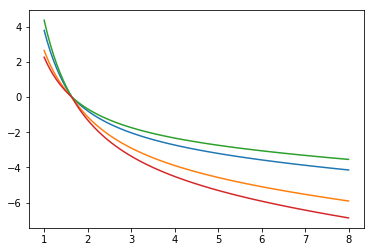

In [130]:
#first we need to generate some data ...

N_events=2400

toy_signalSM=toy('SM')
toy_signalNP=toy('NP')

toy_signalSM.generate(events=N_events , verbose=True)
toy_signalNP.generate(events=N_events , verbose=True)

In [22]:
#now fit fit fit ... 

X=[]
print(fix_array)
fix_array=[0, 0, 0,
           0, 0, 0,
           0, 0, 0,
           0, 0, 0,
           0, 0, 0,
           0, 0, 0,
           0, 0, 0,
           1, 1, 1,
           0, 0, 0,
           1, 1, 1,
           1, 1, 1,
           1, 1, 1,
           0, 1, 1, 
           0, 1, 1, 
           0, 1, 1, 
           0, 1, 1]

#fix_array=fix_alphas
print(fix_array)

for j in tqdm(range(10)):
    optimizeTF , coeffff = toy_signalSM.tf_fit(init= 'SAME SIGN' , fixed=fix_array , verbose=False)
    X.append(coeffff)
    print('ID : ',toy_signalSM.coeffs)
    print('FIT :', coeffff)
X=np.asarray(X)


  0%|          | 0/10 [00:00<?, ?it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]


 10%|█         | 1/10 [00:08<01:15,  8.40s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.238426, -0.40154228, 4.7659254, -1.0180684, 0.22160436, 0.71827316, 0.6485227, 0.06401765, 8.3181715, -0.022056071, -0.27727267, -0.15535921, 6.801584, -0.10662835, -12.396741, -3.4295788, 0.35573027, 4.520611, -5.106161, 1.0866312, -4.3406205, 0.0, 0.0, 0.0, 8.681031, -0.19430166, 13.425611, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4655516, 0.0, 0.0, 1.3500648, 0.0, 0.0, -0.20266053, 0.0, 0.0, 1.2879317, 0.0, 0.0]


 20%|██        | 2/10 [00:18<01:10,  8.78s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-2.424185, -0.29790887, 3.564214, -0.7587385, 0.16517891, 0.5351832, 0.46514773, 0.050478354, 6.2251034, 0.0053901263, -0.20945053, -0.14647323, 5.0700183, -0.079422094, -9.240657, -2.556569, 0.26521227, 3.370637, -3.8184204, 0.8116272, -3.2207928, 0.0, 0.0, 0.0, 6.4731126, -0.14497203, 10.008544, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.092719, 0.0, 0.0, 1.007338, 0.0, 0.0, -0.1520893, 0.0, 0.0, 0.959149, 0.0, 0.0]


 30%|███       | 3/10 [00:25<00:59,  8.44s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-2.7902215, -0.34481046, 4.105074, -0.8755043, 0.19060962, 0.61744636, 0.54713386, 0.056579903, 7.170019, -0.020460978, -0.23845665, -0.13145, 5.8511686, -0.09173051, -10.66444, -2.9511392, 0.30616388, 3.8898125, -4.398438, 0.93556, -3.7266064, 0.0, 0.0, 0.0, 7.4686007, -0.1671962, 11.549484, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2608376, 0.0, 0.0, 1.1622322, 0.0, 0.0, -0.17455855, 0.0, 0.0, 1.1069121, 0.0, 0.0]


 40%|████      | 4/10 [00:33<00:49,  8.33s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-2.6481893, -0.32687634, 3.8957682, -0.83064413, 0.1808323, 0.5858206, 0.51613146, 0.054055355, 6.8050117, -0.019335499, -0.22623155, -0.12478244, 5.5493135, -0.086901, -10.114609, -2.7976682, 0.29021233, 3.687215, -4.1731606, 0.88756526, -3.5337014, 0.0, 0.0, 0.0, 7.0847383, -0.15864408, 10.955251, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1959852, 0.0, 0.0, 1.1027086, 0.0, 0.0, -0.16573134, 0.0, 0.0, 1.0497074, 0.0, 0.0]


 50%|█████     | 5/10 [00:40<00:39,  7.85s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.7183573, -0.4613687, 5.472316, -1.1695647, 0.2545646, 0.82531404, 0.7461076, 0.07343737, 9.552204, -0.025262173, -0.31846106, -0.17846434, 7.8143806, -0.12273624, -14.241914, -3.93954, 0.4086192, 5.192951, -5.86437, 1.2480556, -4.9867077, 0.0, 0.0, 0.0, 9.971094, -0.22320178, 15.420615, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6833493, 0.0, 0.0, 1.550526, 0.0, 0.0, -0.23274647, 0.0, 0.0, 1.4795159, 0.0, 0.0]


 60%|██████    | 6/10 [00:48<00:31,  7.76s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.4016032, -0.4206575, 5.0043287, -1.0675268, 0.23242366, 0.7528052, 0.66654754, 0.06907525, 8.745607, -0.025285378, -0.2907342, -0.15970577, 7.1379647, -0.1121295, -13.009096, -3.5999916, 0.37347612, 4.7454414, -5.36982, 1.1416695, -4.5367107, 0.0, 0.0, 0.0, 9.107835, -0.20384662, 14.0861025, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5376924, 0.0, 0.0, 1.4173832, 0.0, 0.0, -0.2129456, 0.0, 0.0, 1.3498678, 0.0, 0.0]


 70%|███████   | 7/10 [00:54<00:21,  7.26s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-2.9924529, -0.36957702, 4.4018693, -0.93849903, 0.20433745, 0.66175133, 0.58317167, 0.06114497, 7.6925206, -0.018940274, -0.25602293, -0.14505163, 6.2745004, -0.09846698, -11.435716, -3.1641676, 0.32825604, 4.170897, -4.7221804, 1.0038893, -3.9870887, 0.0, 0.0, 0.0, 8.00753, -0.17922954, 12.3839445, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3519039, 0.0, 0.0, 1.2462921, 0.0, 0.0, -0.18739568, 0.0, 0.0, 1.1866088, 0.0, 0.0]


 80%|████████  | 8/10 [01:02<00:15,  7.68s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.7991273, -0.47060192, 5.589938, -1.1934235, 0.25981665, 0.841614, 0.7488713, 0.07661404, 9.770633, -0.028331008, -0.32490885, -0.17905258, 7.9767175, -0.12514402, -14.538275, -4.02219, 0.41723678, 5.3014936, -5.995554, 1.2752103, -5.0787406, 0.0, 0.0, 0.0, 10.180103, -0.22786309, 15.743635, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7186394, 0.0, 0.0, 1.5839589, 0.0, 0.0, -0.23783885, 0.0, 0.0, 1.5092156, 0.0, 0.0]


 90%|█████████ | 9/10 [01:09<00:07,  7.39s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-2.9292934, -0.3641401, 4.310331, -0.92203236, 0.2007143, 0.65037876, 0.5801271, 0.058937665, 7.5438313, -0.03451454, -0.24927777, -0.121570356, 6.164541, -0.09711277, -11.234105, -3.1061096, 0.32217726, 4.0934653, -4.6320825, 0.9850939, -3.9207823, 0.0, 0.0, 0.0, 7.858102, -0.17538615, 12.166487, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3274143, 0.0, 0.0, 1.2233956, 0.0, 0.0, -0.18342479, 0.0, 0.0, 1.1655014, 0.0, 0.0]


100%|██████████| 10/10 [01:16<00:00,  7.12s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-2.7570615, -0.33220538, 4.0494227, -0.85258085, 0.18582886, 0.5998405, 0.47746328, 0.06305065, 7.0761304, -0.017146798, -0.23384225, -0.1305372, 5.7046423, -0.08852094, -10.400344, -2.8871577, 0.29986233, 3.8059158, -4.335885, 0.9189113, -3.5850885, 0.0, 0.0, 0.0, 7.2945466, -0.16340253, 11.277897, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2315109, 0.0, 0.0, 1.1391517, 0.0, 0.0, -0.17212956, 0.0, 0.0, 1.0751373, 0.0, 0.0]


# II ) Testing data generation with background 

In [16]:
from b_meson_fit.optimizer_extended import Optimizer_Extended 
import b_meson_fit.background as background
import b_meson_fit.signal as bmfs 
import tensorflow.compat.v2 as tf 


sig_coeffs = bmf.coeffs.fit(initialization=bmf.coeffs.fit_initialization_scheme_default, current_signal_model="SM")
back_coeffs = background.back_coeffs_fit
alpha = tf.constant(0.8)
ndat = tf.constant(1000000)
nback = tf.Variable(10000)

coeffs = [*sig_coeffs,*back_coeffs,alpha,ndat,nback]

In [17]:
#generate events 

BCK=[back_coeffs[i].numpy() for i in range(len(back_coeffs))]
SIGNAL=[sig_coeffs[i].numpy() for i in range(len(sig_coeffs))]


print('Background coefficients : ', '\n' , BCK , '\n' )
print('Signal coefficients : ' , '\n' ,  SIGNAL , '\n')
events = bmfs.generate_background(BCK,1000,1000000)

events_bck = bmfs.generate_background_mass(BCK)

events_signal= bmfs.generate_signal_mass(SIGNAL)

events = bmfs.generate_all(sig_coeffs, back_coeffs,events_total=100000, alpha = 0.8, poisson = False)

Background coefficients :  
 [100.0, -10.0, 100.0, -80.0, 100.0, -80.0, 100.0, -15.0] 

Signal coefficients :  
 [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0] 



No handles with labels found to put in legend.


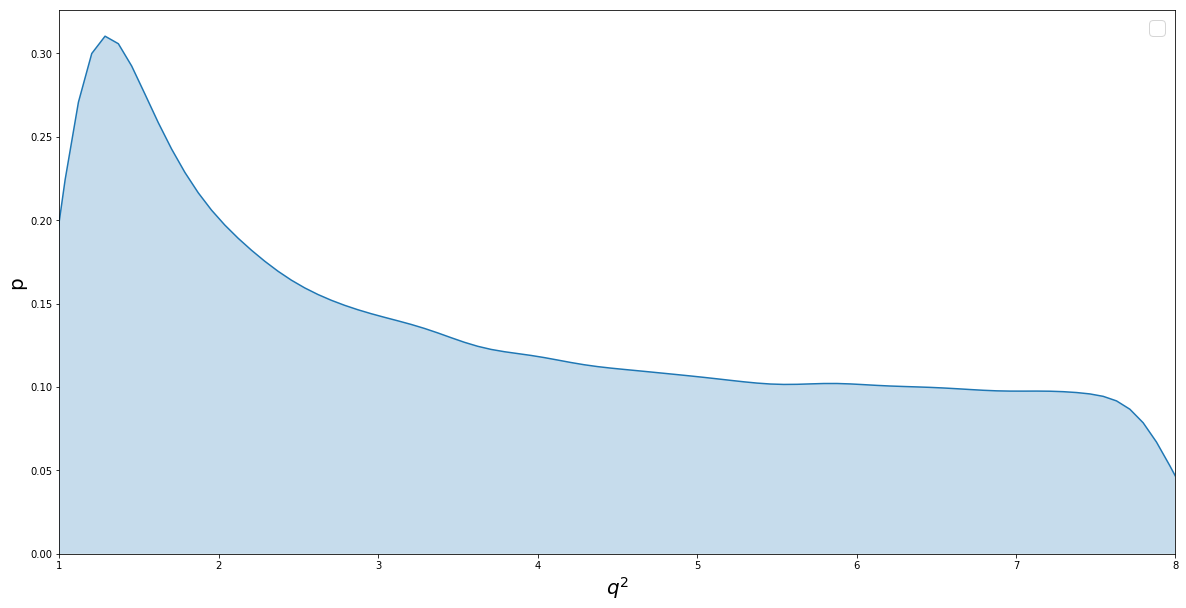

No handles with labels found to put in legend.


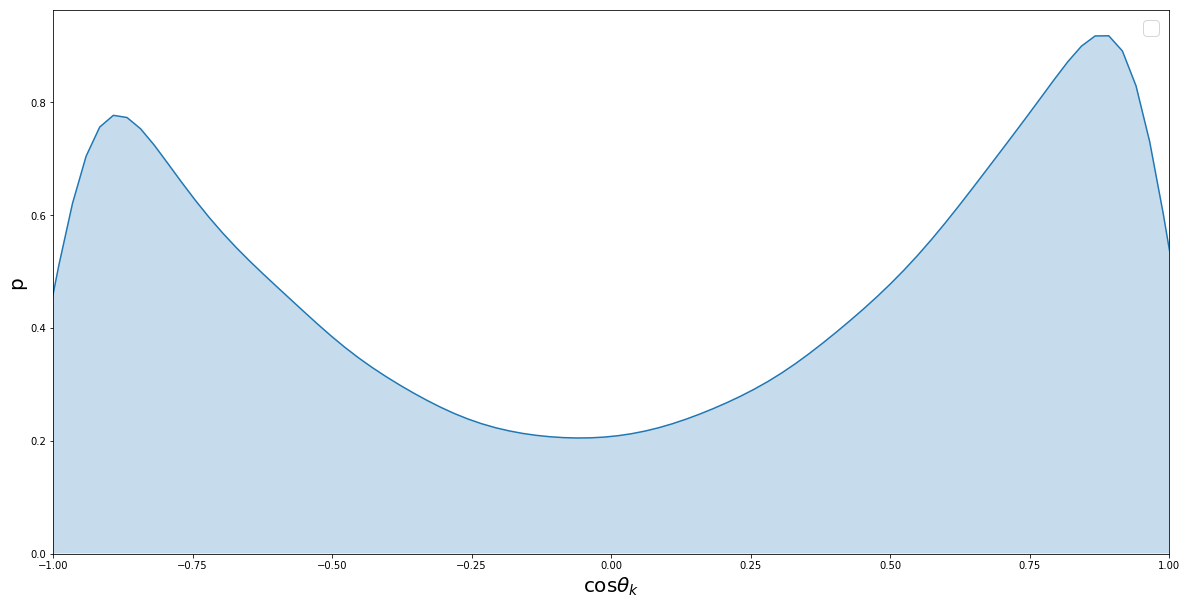

No handles with labels found to put in legend.


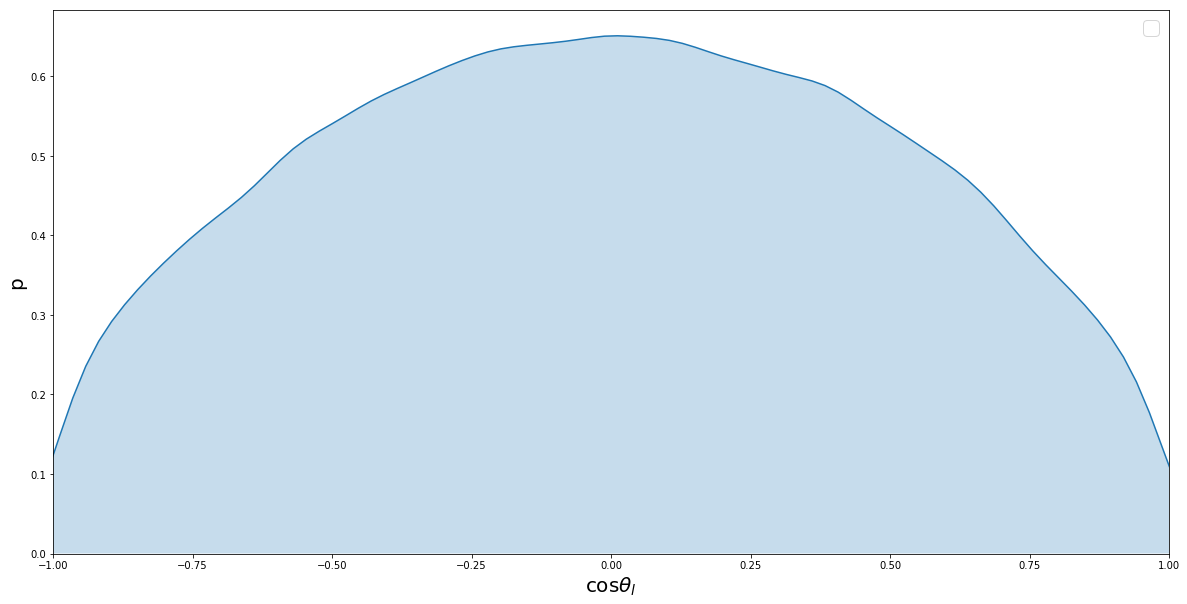

No handles with labels found to put in legend.


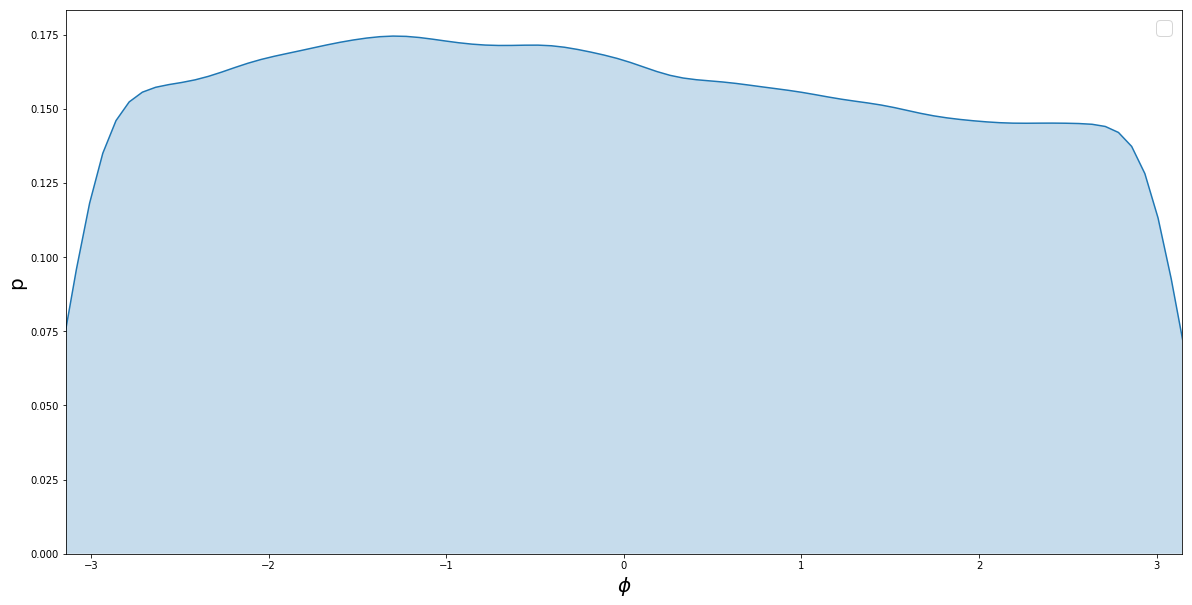

No handles with labels found to put in legend.


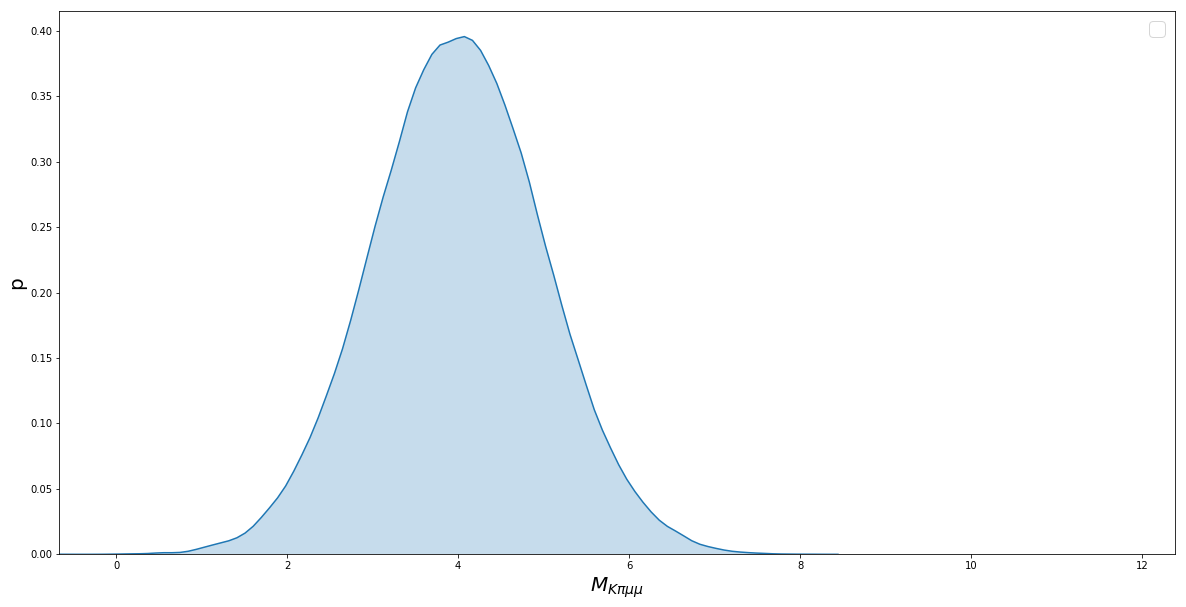

In [21]:
#Plot the observables 

plt.rcParams["figure.figsize"] = (20,10)
Labels=['BCK' , 'SIGNAL']
labels=[r'$q^{2}$' , r'cos$\theta_{k}$' , r'cos$\theta_{l}$' , r'$\phi$' , r'$M_{K\pi\mu\mu}$' ]

for j in range(5):
    #plt.hist([events_bck[:,j].numpy() , events_signal[:,j].numpy()]  , alpha=0.5 ,  bins=100 ,stacked=True , label=Labels)
    sns.kdeplot(events_signal[:,j].numpy()  , shade=True)
    ax = plt.gca()
    ax.set_xlabel(labels[j] , fontsize=20)
    ax.set_ylabel('p' ,fontsize=20)
    plt.xlim((min(events_signal[:,j].numpy()), max(events_bck[:,j].numpy() )))
    ax.legend(fontsize=20)
    plt.show()



In [60]:
from itertools import islice 
import b_meson_fit.mass as mass
import b_meson_fit.background as bkg


Inputt = iter(coeffs) 
splits = [48,8,1,1,1]
sig_coeffs,back_coeffs,[nbar_dat],[n_back],[alpha] = [list(islice(Inputt, elem)) for elem in splits] #this may break

'''
print(back_coeffs, '\n')

print(nbar_dat, '\n')
print(n_back, '\n')
print(alpha, '\n')
'''

def signal_massTF(mass,mean = 4. ,sig = 1. ):
    #print(mass)
    ans = (tf.exp(-tf.math.square(mass - mean, 2.) / (2 * tf.math.square(sig, 2.))))/(sig*tf.math.sqrt(2*np.pi))
    return tf.reshape(ans , [len(ans),])


events_angles, events_mass = tf.split(events,[4,1],axis = 1)


signal = bmfs.pdf(sig_coeffs,events_angles)
masssss=signal_massTF(events_mass)
XXX=tf.math.multiply(signal , masssss)

#print(XXX)
#print(events_mass)
#print(signal)
print(masssss)

#*mass.signal_mass(events_mass)




tf.Tensor(
[3.3275071e-01 3.5851192e-01 2.8164181e-01 ... 2.9154174e-04 4.2960927e-04
 6.6228217e-04], shape=(99999,), dtype=float32)


In [20]:
coeffs = [*sig_coeffs,*back_coeffs,alpha,ndat,nback]


# Tests for exnll 

In [61]:
import b_meson_fit.signal as bmfs  
sig_coeffs = bmf.coeffs.fit(initialization=bmf.coeffs.fit_initialization_scheme_default, current_signal_model="SM")
back_coeffs = background.back_coeffs_fit
alpha = tf.constant(0.8, dtype = 'float32')
ndat = tf.constant(10000, dtype = 'float32')
nback = tf.constant(2000, dtype = 'float32')

coeffs = [*sig_coeffs,*back_coeffs,ndat,nback,alpha]

events = bmf.signal.generate_all(sig_coeffs,back_coeffs,events_total=10000)
print([i.numpy() for i in coeffs])


[-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 100.0, -10.0, 100.0, -80.0, 100.0, -80.0, 100.0, -15.0, 10000.0, 2000.0, 0.8]


In [75]:
bkg.pdfnorm(back_coeffs,events_angles)

<tf.Tensor: id=3481053, shape=(99999,), dtype=float32, numpy=
array([0.07939878, 0.01594275, 0.01779594, ..., 0.02418429, 0.10385238,
       0.15596327], dtype=float32)>

In [71]:
coeffs = [*sig_coeffs,*back_coeffs,ndat,nback,alpha]

def exnll(coeffs,events):
    Inputt = iter(coeffs) 
    splits = [48,8,1,1,1]
    sig_coeffs,back_coeffs,nbar_dat,n_back,alpha = [list(islice(Inputt, elem)) for elem in splits] #this may break

    """
    Extended likelihood fit: ref petredis, patel et all for more!
    Events: Nx5
    """
    alpha = alpha[0]
    nbar_dat = nbar_dat[0]
    n_back = n_back[0]
    n_sig = nbar_dat*alpha
    events_angles, events_mass = tf.split(events,[4,1],axis = 1)

    signal = tf.math.multiply(bmfs.pdf(sig_coeffs,events_angles),tf.reshape(tf.convert_to_tensor(mass.signal_mass(events_mass), dtype = tf.float32),[tf.shape(events_mass)[0],]))
    backg = tf.math.multiply(bkg.pdfnorm(back_coeffs,events_angles),tf.reshape(tf.convert_to_tensor(mass.background_mass(events_mass), dtype = tf.float32),[tf.shape(events_mass)[0],]))
    print(max(signal))
    print(max(backg)
    likelihood = -tf.reduce_sum(
        tf.math.log(
            n_sig*signal
            +n_back*backg
        )
    )
    poisson_counting = (-1*tf.math.multiply(tf.cast(tf.shape(events)[0],dtype = 'float32'),tf.math.log(n_sig + n_back)))+ n_sig + n_back
    print(poisson_counting)
    return (likelihood + poisson_counting)

exnll(coeffs,events)

tf.Tensor(0.021372, shape=(), dtype=float32)
tf.Tensor(0.19092438, shape=(), dtype=float32)
Likelihood : tf.Tensor(-31045.871, shape=(), dtype=float32)
Poisson : tf.Tensor(-82094.195, shape=(), dtype=float32)


<tf.Tensor: id=2480959, shape=(), dtype=float32, numpy=-113140.06>

In [70]:
coeffs = [*sig_coeffs,*back_coeffs,ndat,nback,alpha]
def exnll(coeffs,events):
    Inputt = iter(coeffs) 
    splits = [48,8,1,1,1]
    sig_coeffs,back_coeffs,nbar_dat,n_back,alpha = [list(islice(Inputt, elem)) for elem in splits] #this may break

    """
    Extended likelihood fit: ref petredis, patel et all for more!
    Events: Nx5
    """
    alpha = alpha[0]
    nbar_dat = nbar_dat[0]
    n_back = n_back[0]
    n_sig = nbar_dat*alpha
    events_angles, events_mass = tf.split(events,[4,1],axis = 1)

    signal = tf.math.multiply(bmfs.pdf(sig_coeffs,events_angles),tf.reshape(tf.convert_to_tensor(mass.signal_mass(events_mass), dtype = tf.float32),[tf.shape(events_mass)[0],]))
    
    backg = tf.math.multiply(bkg.pdf(back_coeffs,events_angles),tf.reshape(tf.convert_to_tensor(mass.background_mass(events_mass), dtype = tf.float32),[tf.shape(events_mass)[0],]))
   
    likelihood = -tf.reduce_sum(tf.math.log(tf.math.add(tf.math.multiply(n_sig,signal),tf.math.multiply(n_back,backg))))
    print('Actual likelihood')
    print(likelihood)
    poisson_counting = -tf.math.multiply(tf.cast(tf.shape(events)[0],dtype = 'float32'),tf.math.log(n_sig + n_back)) +n_sig+ n_back
    print('Poisson term')
    print(poisson_counting)
    return (likelihood + poisson_counting)

print(exnll(coeffs,events))
print('\n')
print(bmfs.exnll(coeffs,events))

Actual likelihood
tf.Tensor(-31045.871, shape=(), dtype=float32)
Poisson term
tf.Tensor(-82094.195, shape=(), dtype=float32)
tf.Tensor(-113140.06, shape=(), dtype=float32)


tf.Tensor(-218330.08, shape=(), dtype=float32)
tf.Tensor(-82094.195, shape=(), dtype=float32)
tf.Tensor(-300424.28, shape=(), dtype=float32)


In [ ]:
events_angles, events_mass = tf.split(events,[4,1],axis = 1)

a=mass.background_mass(events_mass)
plt.hist(events_mass)
plt.show()
print(max(a))

KeyboardInterrupt: 

# Tests fit with Background 


In [ ]:

sig_coeffs = bmf.coeffs.fit(initialization=bmf.coeffs.fit_initialization_scheme_default, current_signal_model="SM")
back_coeffs = background.back_coeffs_fit
alpha = tf.constant(0.8, dtype = 'float32')
ndat = tf.constant(10000, dtype = 'float32')
nback = tf.constant(2000, dtype = 'float32')

'''
print(sig_coeffs , '\n')
print(back_coeffs, '\n')
print(ndat, '\n')
print(nback)
'''
coeffs = [*sig_coeffs,*back_coeffs,ndat,nback,alpha]

events = bmf.signal.generate_all(sig_coeffs,back_coeffs,events_total=10000)
print([i.numpy() for i in coeffs])
optimizer = Optimizer_Extended(coeffs,events)
#print(optimizer._normalized_nll())


for i in range(10000000):
    optimizer.minimize()
    #print(optimizer.fit_coeffs[0])
    if optimizer.converged():
        print(optimizer._normalized_nll())
        break
print("not converged")

print([i.numpy() for i in optimizer.fit_coeffs] )

# III ) Fitting with background signal 

In [42]:
#perform fits using the migrad routine (minuit) and AMSGrad (tensorflow)
FX=fix_alphas 

optimizerTF , coeffTF = toy_signalSM.tf_fit(init= 'DEFAULT' , fixed=FX , verbose=True )
optimizeMigrad , coeffMigrad = toy_signalSM.minuitfit(init= 'DEFAULT' , fixed=FX , verbose=True)



 Coeffs used for MC: [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Initial coeffs for tensorflow fit: [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]

  Fitted coefficients :  [-4.140053, -0.15184344, 6.8183246, -0.08432649, -0.0018230017, 0.4660742, -0.13008726, -0.